In [3]:
# Python 3.x Utility Functions
# From https://github.com/norvig/pytudes/blob/master/ipynb/Advent 2017.ipynb

import re
import numpy as np
import math
import random
import urllib.request

from collections import Counter, defaultdict, namedtuple, deque, abc, OrderedDict
from functools   import lru_cache
from itertools   import (permutations, combinations, chain, cycle, product, islice, 
                         takewhile, zip_longest, count as count_from)
from heapq       import heappop, heappush

identity = lambda x: x
letters  = 'abcdefghijklmnopqrstuvwxyz'

cat = ''.join

Ø   = frozenset() # Empty set
inf = float('inf')
BIG = 10 ** 999

In [4]:
import networkx as nx

In [2]:
#Part 01

In [67]:
ex = '''0 <-> 2
1 <-> 1
2 <-> 0, 3, 4
3 <-> 2, 4
4 <-> 2, 3, 6
5 <-> 6
6 <-> 4, 5'''

In [112]:
with open('input.txt') as f:
    cont = f.readlines()
content = [x.strip() for x in cont] 

In [123]:
x1 = [x.split(' <-> ') for x in content]

In [124]:
x1

[['0', '795'],
 ['1', '156'],
 ['2', '715'],
 ['3', '1361, 1698'],
 ['4', '551, 672'],
 ['5', '514'],
 ['6', '1806'],
 ['7', '1700'],
 ['8', '599, 1068, 1850'],
 ['9', '580, 1517'],
 ['10', '521'],
 ['11', '461'],
 ['12', '896'],
 ['13', '464'],
 ['14', '526'],
 ['15', '15'],
 ['16', '627, 997'],
 ['17', '725'],
 ['18', '1803'],
 ['19', '129, 1608, 1712'],
 ['20', '1005'],
 ['21', '252, 386, 1818'],
 ['22', '32, 1168, 1266, 1757'],
 ['23', '212, 664'],
 ['24', '983'],
 ['25', '1271, 1356'],
 ['26', '545'],
 ['27', '639'],
 ['28', '509'],
 ['29', '686, 959, 1521'],
 ['30', '172'],
 ['31', '1721'],
 ['32', '22'],
 ['33', '436'],
 ['34', '96, 116, 661, 1102'],
 ['35', '827, 1274, 1533'],
 ['36', '483, 586'],
 ['37', '556'],
 ['38', '709'],
 ['39', '551, 1196'],
 ['40', '42'],
 ['41', '485'],
 ['42', '40, 475, 930'],
 ['43', '121'],
 ['44', '202, 759'],
 ['45', '45, 721, 764'],
 ['46', '903'],
 ['47', '616, 1053'],
 ['48', '1933'],
 ['49', '334, 476, 516, 1212'],
 ['50', '717, 1412'],
 ['5

In [127]:
x2 = [[[x[0]], x[1].split(", ")] for x in x1]

In [128]:
x2

[[['0'], ['795']],
 [['1'], ['156']],
 [['2'], ['715']],
 [['3'], ['1361', '1698']],
 [['4'], ['551', '672']],
 [['5'], ['514']],
 [['6'], ['1806']],
 [['7'], ['1700']],
 [['8'], ['599', '1068', '1850']],
 [['9'], ['580', '1517']],
 [['10'], ['521']],
 [['11'], ['461']],
 [['12'], ['896']],
 [['13'], ['464']],
 [['14'], ['526']],
 [['15'], ['15']],
 [['16'], ['627', '997']],
 [['17'], ['725']],
 [['18'], ['1803']],
 [['19'], ['129', '1608', '1712']],
 [['20'], ['1005']],
 [['21'], ['252', '386', '1818']],
 [['22'], ['32', '1168', '1266', '1757']],
 [['23'], ['212', '664']],
 [['24'], ['983']],
 [['25'], ['1271', '1356']],
 [['26'], ['545']],
 [['27'], ['639']],
 [['28'], ['509']],
 [['29'], ['686', '959', '1521']],
 [['30'], ['172']],
 [['31'], ['1721']],
 [['32'], ['22']],
 [['33'], ['436']],
 [['34'], ['96', '116', '661', '1102']],
 [['35'], ['827', '1274', '1533']],
 [['36'], ['483', '586']],
 [['37'], ['556']],
 [['38'], ['709']],
 [['39'], ['551', '1196']],
 [['40'], ['42']],
 [['

In [129]:
G = nx.Graph()

In [130]:
x_flat = [list(product(x[0], x[1])) for x in x2]

In [131]:
x_flat

[[('0', '795')],
 [('1', '156')],
 [('2', '715')],
 [('3', '1361'), ('3', '1698')],
 [('4', '551'), ('4', '672')],
 [('5', '514')],
 [('6', '1806')],
 [('7', '1700')],
 [('8', '599'), ('8', '1068'), ('8', '1850')],
 [('9', '580'), ('9', '1517')],
 [('10', '521')],
 [('11', '461')],
 [('12', '896')],
 [('13', '464')],
 [('14', '526')],
 [('15', '15')],
 [('16', '627'), ('16', '997')],
 [('17', '725')],
 [('18', '1803')],
 [('19', '129'), ('19', '1608'), ('19', '1712')],
 [('20', '1005')],
 [('21', '252'), ('21', '386'), ('21', '1818')],
 [('22', '32'), ('22', '1168'), ('22', '1266'), ('22', '1757')],
 [('23', '212'), ('23', '664')],
 [('24', '983')],
 [('25', '1271'), ('25', '1356')],
 [('26', '545')],
 [('27', '639')],
 [('28', '509')],
 [('29', '686'), ('29', '959'), ('29', '1521')],
 [('30', '172')],
 [('31', '1721')],
 [('32', '22')],
 [('33', '436')],
 [('34', '96'), ('34', '116'), ('34', '661'), ('34', '1102')],
 [('35', '827'), ('35', '1274'), ('35', '1533')],
 [('36', '483'), ('

In [132]:
x_flat = [item for sublist in x_flat for item in sublist]

In [133]:
x_flat

[('0', '795'),
 ('1', '156'),
 ('2', '715'),
 ('3', '1361'),
 ('3', '1698'),
 ('4', '551'),
 ('4', '672'),
 ('5', '514'),
 ('6', '1806'),
 ('7', '1700'),
 ('8', '599'),
 ('8', '1068'),
 ('8', '1850'),
 ('9', '580'),
 ('9', '1517'),
 ('10', '521'),
 ('11', '461'),
 ('12', '896'),
 ('13', '464'),
 ('14', '526'),
 ('15', '15'),
 ('16', '627'),
 ('16', '997'),
 ('17', '725'),
 ('18', '1803'),
 ('19', '129'),
 ('19', '1608'),
 ('19', '1712'),
 ('20', '1005'),
 ('21', '252'),
 ('21', '386'),
 ('21', '1818'),
 ('22', '32'),
 ('22', '1168'),
 ('22', '1266'),
 ('22', '1757'),
 ('23', '212'),
 ('23', '664'),
 ('24', '983'),
 ('25', '1271'),
 ('25', '1356'),
 ('26', '545'),
 ('27', '639'),
 ('28', '509'),
 ('29', '686'),
 ('29', '959'),
 ('29', '1521'),
 ('30', '172'),
 ('31', '1721'),
 ('32', '22'),
 ('33', '436'),
 ('34', '96'),
 ('34', '116'),
 ('34', '661'),
 ('34', '1102'),
 ('35', '827'),
 ('35', '1274'),
 ('35', '1533'),
 ('36', '483'),
 ('36', '586'),
 ('37', '556'),
 ('38', '709'),
 ('39

In [134]:
G.add_edges_from([x for x in x_flat])

In [135]:
G.nodes()

NodeView(('0', '795', '1', '156', '2', '715', '3', '1361', '1698', '4', '551', '672', '5', '514', '6', '1806', '7', '1700', '8', '599', '1068', '1850', '9', '580', '1517', '10', '521', '11', '461', '12', '896', '13', '464', '14', '526', '15', '16', '627', '997', '17', '725', '18', '1803', '19', '129', '1608', '1712', '20', '1005', '21', '252', '386', '1818', '22', '32', '1168', '1266', '1757', '23', '212', '664', '24', '983', '25', '1271', '1356', '26', '545', '27', '639', '28', '509', '29', '686', '959', '1521', '30', '172', '31', '1721', '33', '436', '34', '96', '116', '661', '1102', '35', '827', '1274', '1533', '36', '483', '586', '37', '556', '38', '709', '39', '1196', '40', '42', '41', '485', '475', '930', '43', '121', '44', '202', '759', '45', '721', '764', '46', '903', '47', '616', '1053', '48', '1933', '49', '334', '476', '516', '1212', '50', '717', '1412', '51', '331', '52', '1953', '53', '853', '54', '430', '55', '1635', '56', '826', '1985', '57', '1375', '58', '868', '1887',

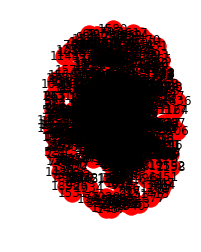

In [136]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(121)
nx.draw(G, with_labels=True)


In [137]:
subg = [list(x) for x in nx.connected_component_subgraphs(G)]

In [138]:
[len(x) for x in subg if '0' in x]

[130]

In [139]:
len(subg)

189

In [134]:
#Part2